# Gap junction coupling

Here we investigating the coupling coefficient between striatal fast spiking interneurons connected by gap junctions. A network of 100 FS neurons is created, and current is injected into a subset of them. The coupling to neighbouring neurons is calculated and shown.



Example current injection and corresponding voltage deflection in gap junction coupled striatal fast spiking interneuron (Koos, Tepper 1999). Here a 50ms current injection is done, and the ratio of the voltage deflection in the neighbouring neuron to the injected neuron is calculated. Out of seven pairs recorded, coupling factors of 3%, 7% and 20% were found (Koos, Tepper 2004).
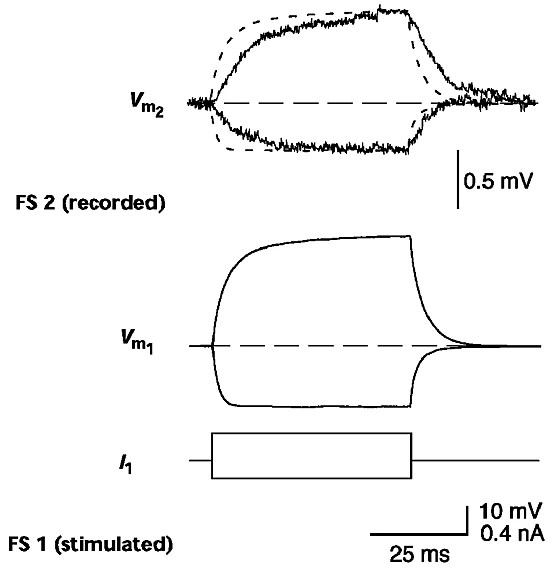

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
network_path = "FS_gap_junction_coupling_simulation"
experiment_config_file = "FS_gap_junction_experiment-0.json"

In [3]:
# 80500 neurons per mm3, 1.3% are FS.
n_FS = 100
d_cube = (n_FS/(80500 * 0.013))**(1/3) * 1e-3

from snudda.place import create_cube_mesh
mesh_file = os.path.join(network_path, "mesh", "volume.obj")
create_cube_mesh(mesh_file, [0,0,0], d_cube, "FS network volume")

In [4]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="StriatalVolume", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

si.add_neurons(name="FS", num_neurons=n_FS, volume_id="StriatalVolume",
               neuron_dir=os.path.join("$SNUDDA_DATA","neurons","striatum","fs"))

cluster_FS_synapses = True
cluster_FS_gap_junctions = False
FS_gGABA = [1.1e-9, 1.5e-9]
FS_gGapJunction = [0.5e-9, 0.1e-9]

if False:
    # For this example we just want gap junctions, just listing GABA here for completness
    si.add_neuron_target(neuron_name="FS",
                         target_name="FS",
                         connection_type="GABA",
                         dist_pruning=None,
                         f1=0.15, soft_max=5, mu2=2, a3=1,
                         conductance=FS_gGABA,
                         cluster_synapses=cluster_FS_synapses,
                         mod_file="tmGabaA",
                         channel_param_dictionary={"tau1": (1.33e-3, 1e3),
                                                   "tau2": (5.7e-3, 1e3)})
    
si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="GapJunction",
                     dist_pruning=None,
                     f1=0.7, soft_max=8, mu2=2, a3=1.0,
                     conductance=FS_gGapJunction,
                     cluster_synapses=cluster_FS_gap_junctions,
                     channel_param_dictionary=None)

si.write_json()

Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_gap_junction_coupling_simulation/network-config.json


In [5]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 219/512 (84 neurons)
Processing hyper voxel : 218/512 (72 neurons)
Processing hyper voxel : 155/512 (71 neurons)
Processing hyper voxel : 227/512 (65 neurons)
Processing hyper voxel : 154/512 (62 neurons)
Processing hyper voxel : 226/512 (58 neurons)
Processing hyper voxel : 163/512 (57 neurons)
Processing hyper voxel : 162/512 (46 neurons)
Processing hyper voxel : 220/512 (45 neurons)
Processing hyper voxel : 211/512 (41 neurons)
Processing hyper voxel : 147/512 (38 neurons)
Processing hyper voxel : 156/512 (37 neurons)
Processing hyper voxel : 228/512 (37 neurons)
Processing hyper voxel : 283/512 (37 neurons)
Processing hyper voxel : 210/512 (34 neurons)
Processing hyper voxel : 146/512 (33 neurons)
Processing hyper voxel : 291/512 (30 neurons)
Processing hyper voxel : 282/512 (29 neurons)
Processing hyper voxel : 164/512 (28 neurons)
Processing hyper voxel : 148/512 (25 neurons)
Processing hyper voxel

Using snudda_load we can find out which neurons are in the centre of our structure, to avoid edge effects. Here the option ```--centre 5``` lists the five neurons closest to the centre. These (26, 38, 24, 44) were then picked to receive current injectiosn, see [FS_gap_junction_experiment-0.json](FS_gap_junction_experiment-0.json)

In [6]:
!snudda_load FS_gap_junction_coupling_simulation/network-synapses.hdf5 --centre 5

Loading 100 neurons with 0 synapses and 511 gap junctions
26 FS_2: (-33.2, -32.3, -39.2) μm, distance to centre 30.9 μm
38 FS_3: (-17.2, 46.6, -21.8) μm, distance to centre 59.5 μm
24 FS_0: (-2.9, -70.3, -57.0) μm, distance to centre 67.6 μm
44 FS_3: (-36.6, -25.5, 47.2) μm, distance to centre 75.2 μm
11 FS_0: (-45.6, -54.7, -98.6) μm, distance to centre 91.2 μm


Using ```--listGJ``` we can see that neuron 26 connects to three other neurons using gap junctions. To see all options for ```snudda_load``` type ```--help```.

In [7]:
!snudda_load FS_gap_junction_coupling_simulation/network-synapses.hdf5 --listGJ 26


Loading 100 neurons with 0 synapses and 511 gap junctions
List gap junctions of neuronID = 26 (FS_2)
4 : FS_2 (2 gap junctions)
5 : FS_3 (3 gap junctions)
57 : FS_2 (3 gap junctions)


In [8]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca

In [9]:
from snudda.simulate.pair_recording import PairRecording

pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Pair recording output file: FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5
Loading 100 neurons with 0 synapses and 511 gap junctions
Found 1022 local gap junctions on node.
Running simulation for 1.6 s
Running Neuron simulator 1600 ms, with dt=0.025
1% done. Elapsed: 11.3 s, estimated time left: 1117.4 s
11% done. Elapsed: 121.4 s, estimated time left: 982.1 s
20% done. Elapsed: 222.3 s, estimated time left: 889.1 s
30% done. Elapsed: 334.4 s, estimated time left: 780.2 s
39% done. Elapsed: 444.0 s, estimated time left: 694.5 s
48% done. Elapsed: 550.9 s, estimated time left: 596.8 s
57% done. Elapsed: 659.7 s, estimated time left: 497.6 s
66% done. Elapsed: 765.8 s, estimated time left: 394.5 s
75% done. Elapsed: 870.4 s, estimated time left: 290.1 s
85% done. Elapsed: 980.0 s, estimated time left: 172.9 s
95% done. Elapsed: 1080.5 s, estimated time left: 56.9 s
99% done. Elapsed: 1120.3 s, estimated time left: 11.3 s
Neuron simulation finished
Simulation r

In [10]:
%matplotlib notebook
from snudda.analyse.analyse_gap_junction_coupling import AnalyseGapJunctionCoupling
ac = AnalyseGapJunctionCoupling(network_path=network_path, 
                                experiment_config_file=experiment_config_file)

Loading 100 neurons with 0 synapses and 511 gap junctions
Loading FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5


This lists the neuron pairs that are connected by most number of gap junctions.

In [11]:
ac.print_gj_list(n_pairs=20)

14 -- 19 : 10 gap junctions
24 -- 35 : 8 gap junctions
22 -- 37 : 8 gap junctions
47 -- 51 : 8 gap junctions
68 -- 74 : 7 gap junctions
56 -- 57 : 7 gap junctions
8 -- 32 : 7 gap junctions
2 -- 7 : 7 gap junctions
56 -- 68 : 6 gap junctions
6 -- 15 : 6 gap junctions
90 -- 91 : 6 gap junctions
53 -- 94 : 6 gap junctions
51 -- 89 : 6 gap junctions
53 -- 65 : 5 gap junctions
10 -- 11 : 5 gap junctions
60 -- 68 : 5 gap junctions
15 -- 29 : 5 gap junctions
15 -- 19 : 5 gap junctions
44 -- 68 : 5 gap junctions
47 -- 60 : 5 gap junctions


### Plotting coupling coefficient

The coupling coefficient is defined as the ratio of the voltage deflection in the soma of the measured neuron divided by the voltage deflection in the neuron injected with current.

The coupling coefficient is dependent on the duration of the current injection. Shorter pulses result in smaller coupling coefficient. If you want to add additional current pulses, edit [FS_gap_junction_experiment-0.json](FS_gap_junction_experiment-0.json) (and remember to also increase simulation duration).

Current injection is 40nA, except neuron 22 which spiked at 40nA, and is set to 30nA.

<IPython.core.display.Javascript object>


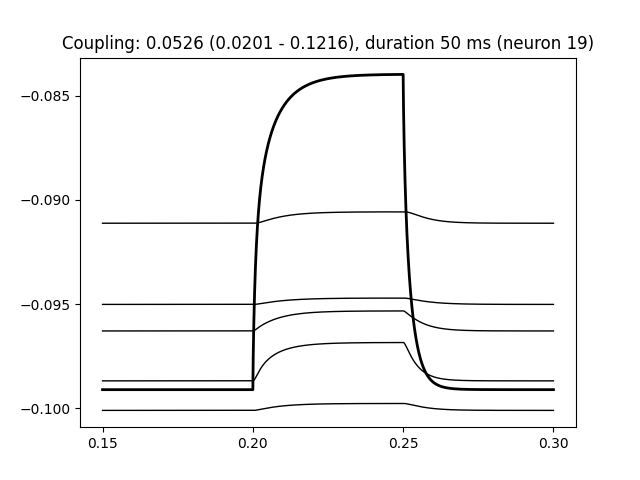

<IPython.core.display.Javascript object>


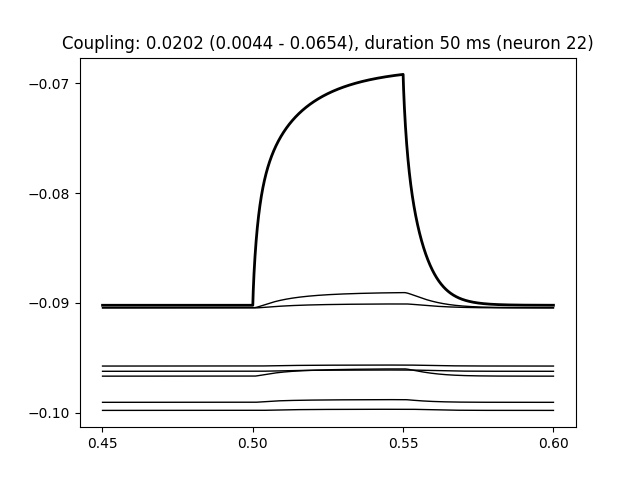

<IPython.core.display.Javascript object>


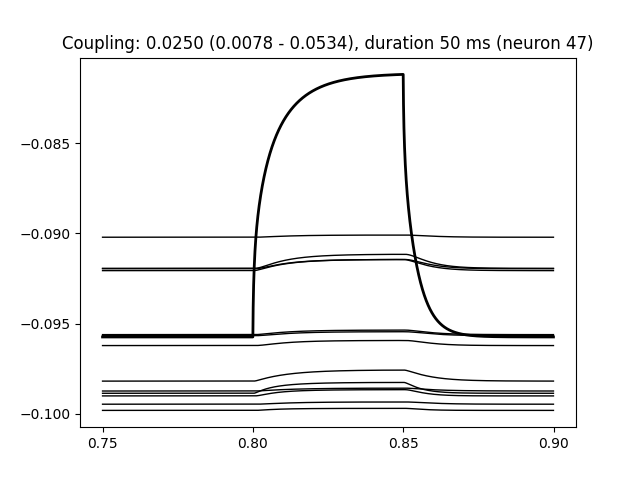

<IPython.core.display.Javascript object>


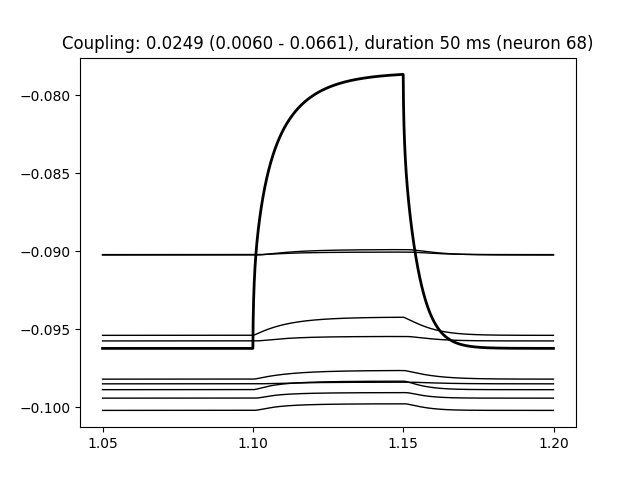

<IPython.core.display.Javascript object>


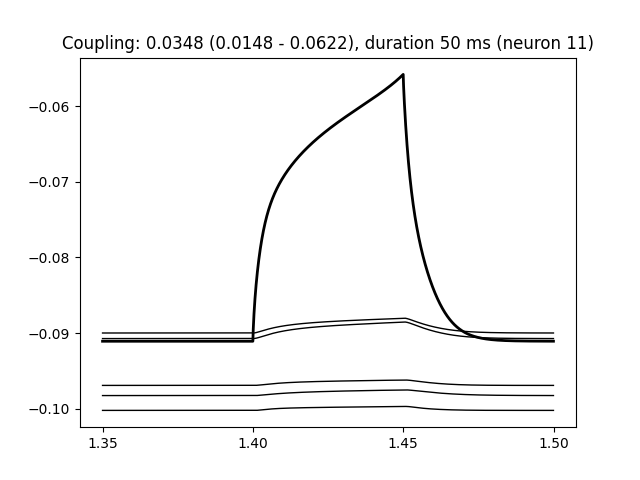

In [12]:
ac.plot_coupling(duration=0.050, amplitude=None)

In [13]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
sa = SnuddaAnalyse(hdf5_file=os.path.join(network_path, "network-synapses.hdf5"))

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 100 neurons with 0 synapses and 511 gap junctions
Number of neurons: 100
Created connection matrix 5.665099888574332e-05 seconds
GJ row : 0 - 0.0 %  time : 0.0009948279985110275 seconds
Created gap junction connection matrix 0.0029057739993731957 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 100/100
Calculating synapse distance histogram
Creating dist histogram
Created distance histogram (optimised) in 0.0009760000029928051 seconds
Saving cache to FS_gap_junction_coupling_simulation/network-synapses.hdf5-cache


Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [9900.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1367: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


<IPython.core.display.Javascript object>


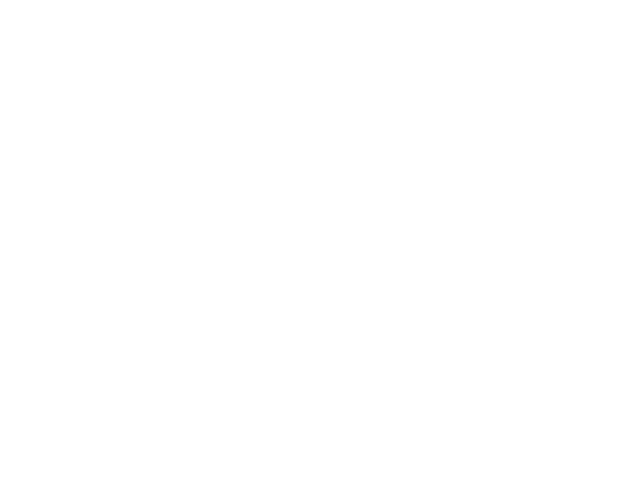

P(d<0.00025) = 0.04333764553686934
P(d<0.00025) = 0.04333764553686934
Wrote FS_gap_junction_coupling_simulation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-3D-dist.pdf


In [14]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=True,
                               connection_type="gapjunctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 150 connections


<IPython.core.display.Javascript object>


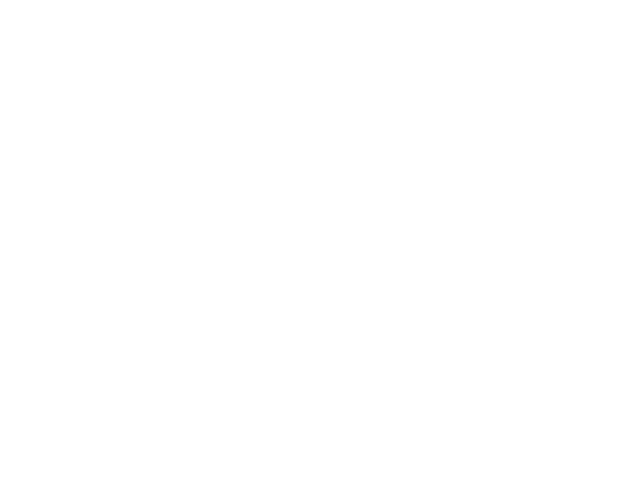

Wrote FS_gap_junction_coupling_simulation/figures/Network-number-of-gapjunctions-from-FS-to-FS-per-cell.pdf


In [15]:
sa.plot_num_synapses_per_pair("FS", "FS", connection_type="gapjunctions")

Calculating number of incoming connections FS -> FS
Centering in None : Keeping 9/100
#pre = 100, #post = 9


<IPython.core.display.Javascript object>


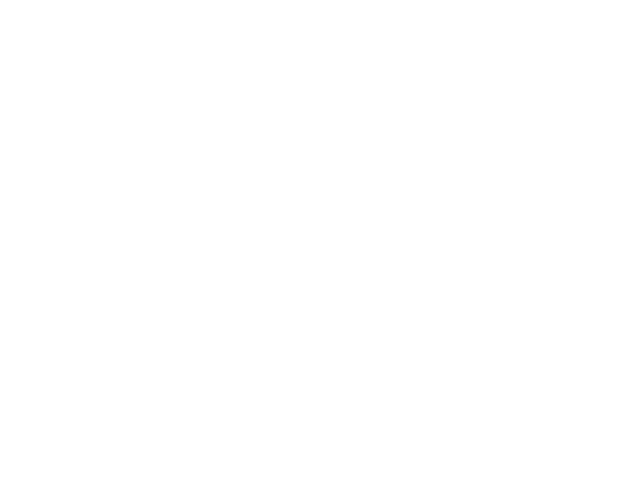

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-input-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


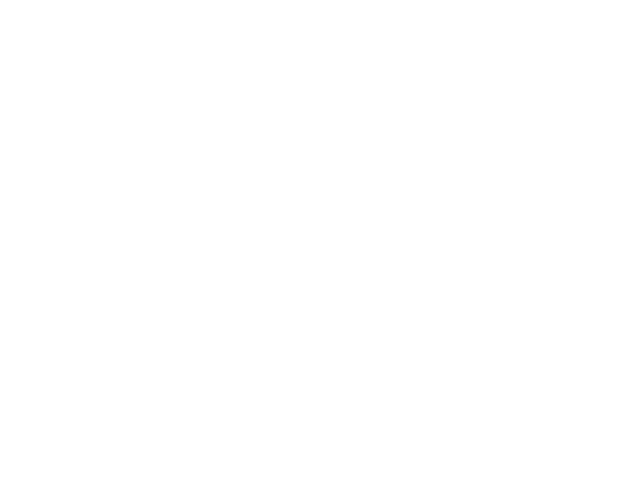

Wrote FS_gap_junction_coupling_simulation/figures/Network-gapjunctions-to-FS-from-FS.pdf


<IPython.core.display.Javascript object>


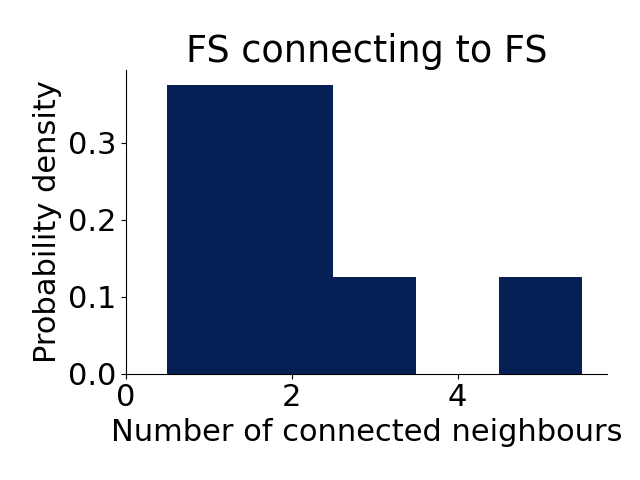

In [16]:
sa.plot_incoming_connections(neuron_type="FS", pre_type="FS", connection_type="gapjunctions")